# Drama List Exploratory Data Analysis

Which year has the most dramas produced? Which actors appeared as the main leads the most frequently? What are the most common genres and tags?

I wanted to find out some of these questions so I have used visualization tools to discover more.

## 1. Import Libraries and Read CSV File

In [1]:
import pandas as pd
import collections
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
drama_list_df = pd.read_csv('drama_list.csv')
drama_list_df.head()

,drama_title,year,main_actors,genres,tags,synopsis
0,The Untamed (2019),2019,"Sean Xiao, Wang Yi Bo","Action, Adventure, Friendship, Historical, ...","Censored Romance, Tragic Past, Adapted From A ...",Wei Wuxian and Lan Wangji are two completely d...
1,My Mister (2018),2018,"Lee Sun Kyun, IU","Business, Psychological, Life, Drama, Fami...","Nice Male Lead, Strong Female Lead, Healing, I...",Park Dong Hoon is a middle-aged engineer who i...
2,Signal (2016),2016,"Lee Je Hoon, Kim Hye Soo, Jo Jin Woong","Suspense, Mystery, Crime, Drama, Supernatu...","Different Timelines, Criminal Profiler, Serial...","Fifteen years ago, a young girl was kidnapped ..."
3,Nirvana in Fire (2015),2015,"Hu Ge, Tamia Liu, Wang Kai, Chen Long, Leo Wu,...","Friendship, Historical, Wuxia, Drama, Fant...","Bromance, Smart Male Lead, Political Intrigue,...",During the Datong era of the Southern Liang Dy...
4,Prison Playbook (2017),2017,"Park Hae Soo, Jung Kyung Ho","Friendship, Comedy, Life, Drama","Prison, Bromance, Slight Romance, Black Comedy...","Kim Je Hyuk, a famous baseball player, is conv..."


## 2. Most Common Main Actors, Genres and Tags

I used the collections library to count the number of times these words appear, and then generated a wordcloud of it.

### Create functions to count frequencies and create wordcloud

In [91]:
# function to create a big list of words from a DataFrame column
def count(df, column):
    all_data = []
    for row in df[column]:
        l = str(row).split(', ') # splits row based on commas
        for word in l:
            if word.strip() != 'nan': # some rows have no words (indicated by 'nan')
                all_data.append(word.strip()) # remove extra spaces and add word to dict
    return all_data

In [100]:
# function to create word cloud
def create_word_cloud(counter): # create function that draws the wordcloud
    cloud = WordCloud(width=720, height= 540, background_color = "white", max_words = 50)
    cloud.generate_from_frequencies(dict(counter))
    plt.figure(figsize=(10, 7.5))
    plt.imshow(cloud)
    plt.axis('off');
    plt.show()

### Frequencies of genres

In [97]:
all_genres = count(drama_list_df, 'genres')
counter=collections.Counter(all_genres) # genres and the number of appearances
print(counter)

Counter({'Romance': 2831, 'Drama': 2406, 'Comedy': 1544, 'Family': 772, 'Friendship': 551, 'Life': 538, 'Historical': 515, 'Mystery': 499, 'Action': 469, 'School': 413, 'Melodrama': 382, 'Youth': 313, 'Fantasy': 285, 'Suspense': 282, 'Investigation': 262, 'Crime': 225, 'Business': 215, 'Supernatural': 215, 'Detective': 212, 'Medical': 178, 'Thriller': 150, 'Adventure': 146, 'Wuxia': 142, 'Tragedy': 132, 'Martial Arts': 130, 'Tokusatsu': 130, 'Psychological': 123, 'Food': 110, 'Sci-Fi': 108, 'Sports': 107, 'Political': 102, 'Law': 102, 'Music': 92, 'Horror': 72, 'Mature': 63, 'Sitcom': 47, 'Military': 45, 'War': 41, 'Vampire': 25, 'Animals': 21, 'Zombies': 4, 'Documentary': 4})


In [98]:
print(counter.keys()) # a list of unique genres

dict_keys(['Action', 'Adventure', 'Friendship', 'Historical', 'Mystery', 'Horror', 'Comedy', 'Wuxia', 'Fantasy', 'Business', 'Psychological', 'Life', 'Drama', 'Family', 'Suspense', 'Crime', 'Supernatural', 'Investigation', 'Tragedy', 'Political', 'School', 'Romance', 'Melodrama', 'Thriller', 'Youth', 'Sci-Fi', 'War', 'Law', 'Detective', 'Sports', 'Military', 'Medical', 'Martial Arts', 'Food', 'Zombies', 'Music', 'Mature', 'Tokusatsu', 'Animals', 'Sitcom', 'Vampire', 'Documentary'])


In [99]:
print(counter.most_common(3)) # top 3 most common genres

[('Romance', 2831), ('Drama', 2406), ('Comedy', 1544)]


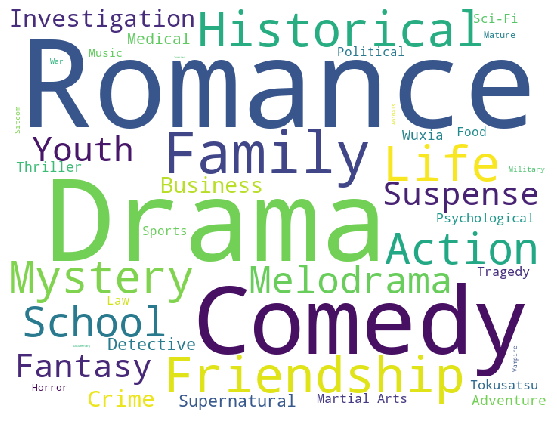

In [101]:
create_word_cloud(counter)

Not surprising, romance tops the list as the most common genre. Funnily, the genre 'drama' appears in almost half of the dramas in the list. 

### Frequencies of tags

In [102]:
all_tags = count(drama_list_df, 'tags')
counter=collections.Counter(all_tags)  # tags and the number of appearances
# print(counter)

In [103]:
print(counter.most_common(10)) # top 10 most common genres

[('Adapted From A Manga', 333), ('Adapted From A Novel', 329), ('Love Triangle', 293), ('Strong Female Lead', 246), ('Miniseries', 192), ('Award-Winning', 191), ('High School', 180), ('Revenge', 176), ('Web Series', 168), ('Older Woman/Younger Man', 163)]


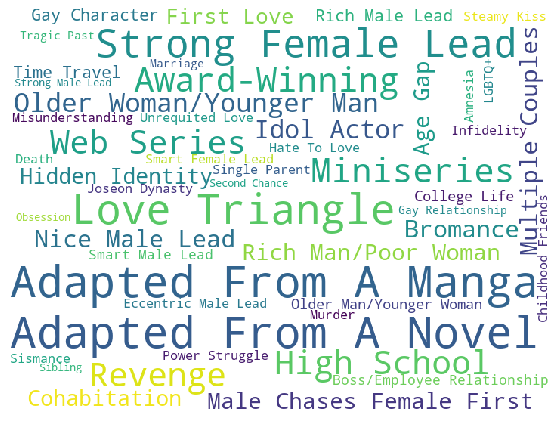

In [104]:
create_word_cloud(counter)

The tags 'Adapted from a Manga' and 'Adapted from a Novel' topped the list - not too surprising since many dramas are spun out from books. Glad to have 'strong female lead' coming in 4th. Dramas with strong female leads are attractive to me as well. 

### Frequencies of main actors

In [105]:
all_actors = count(drama_list_df, 'main_actors')
counter=collections.Counter(all_actors)  # main actors and the number of appearances
# print(counter)

In [106]:
print(counter.most_common(10))

[('Charmaine Sheh', 34), ('Myolie  Wu', 31), ('Tavia Yeung', 30), ('Fukada Kyoko', 30), ('Raymond Lam', 29), ('Bosco Wong', 29), ('Wallace Huo', 26), ('Kimura Takuya', 26), ('Roger Kwok', 26), ('Moses Chan', 25)]


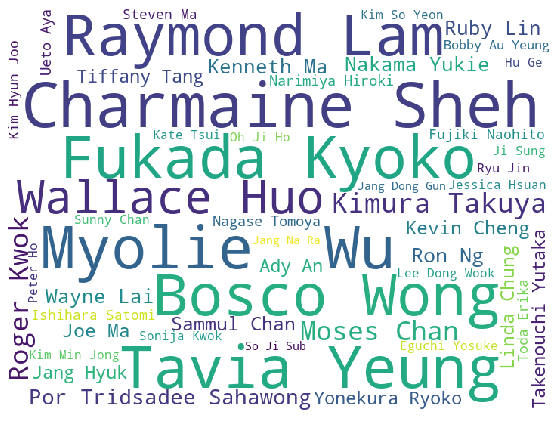

In [107]:
create_word_cloud(counter)

This is pretty interesting. Actors who have the most main lead roles come from Hong Kong - the likes of Raymond Lam, Charmaine Sheh, Myolie Wu, Bosco Wong and Tavia Yeung. The other two - Fukada Kyoko and Wallace Huo - act in Japanese and Chinese dramas respectively.

Here, users can type their favourite actor's name and find the dramas that he/she was the main lead.

In [5]:
actor = 'Zanilia Zhao' # type actor name
drama_list_df[drama_list_df['main_actors'].str.contains(actor) == True] # find dramas that the actor was the main lead

,drama_title,year,main_actors,genres,tags,synopsis
20,The Story of Ming Lan (2018),2018,"Zanilia Zhao, William Feng","Historical, Comedy, Romance, Life, Youth, ...","Smart Female Lead, Adapted From A Novel, Stron...","The Story of Ming Lan, based on the novel writ..."
332,Rookie Agent Rouge (2016),2016,"Lu Yi, Zanilia Zhao, Mickey Yuan, Tao Xin Ran","Military, Historical, Romance, War","Secret Mission, Drawing, Secret, Secret Organi...",Lan Yan Zhi is a privileged banker's daughter....
367,Princess Agents (2017),2017,"Zanilia Zhao, Kenny Lin, Shawn Dou, Li Qin","Action, Historical, Romance, Wuxia, Drama,...","Strong Female Lead, Revenge, Adapted From A No...",The story takes place during the chaotic times...
413,Boss & Me (2014),2014,"Zanilia Zhao, Hans Zhang, Huang You Ming, Li C...","Food, Friendship, Business, Comedy, Romance","Adapted From A Novel, Boss/Employee Relationsh...",Big conglomerate president Feng Teng has a you...
430,Legend of Lu Zhen (2013),2013,"Zanilia Zhao, Chen Xiao","Historical, Romance, Tragedy","Power Struggle, Strong Female Lead","To escape her cruel stepmother, Lu Zhen enters..."
485,The Journey of Flower (2015),2015,"Wallace Huo, Zanilia Zhao","Historical, Romance, Wuxia, Martial Arts, ...","Unrequited Love, Student/teacher, Female Warri...","Based off the novel by Fresh Guo Guo, tells th..."
501,Noble Aspirations (2016),2016,"Li Yi Feng, Zanilia Zhao, Yang Zi, Qin Jun Jie...","Action, Historical, Romance, Wuxia, Drama,...","Fantasy World, Xianxia, Adapted From A Novel","One night, when Zhang Xiao Fan was eleven year..."
631,Cuo Dian Yuan Yang (2012),2012,"Zanilia Zhao, Qi Ji, Han Dong, Cassie Zhou","Historical, Comedy, Romance, Drama, Family","Doppelganger, Power Struggle, Death, Hate To L...",Su Huan Er got a bad feeling when Shi Wu Ji ag...
649,Our Glamorous Time (2018),2018,"Zanilia Zhao, Jin Han","Action, Business, Romance","Adapted From A Novel, Candle Night, Fashion De...",Li Zhi Cheng is a former soldier who has been ...
661,Noble Aspirations II (2016),2016,"Li Yi Feng, Zanilia Zhao, Yang Zi, Cheng Yi, Q...",NaN,"Fantasy World, Xianxia, Adapted From A Novel",The is the sequel to the Legend of Chusen. Thi...
